In [1]:
%load_ext autoreload
%autoreload 2

import networkx as nx

from qiskit_optimization.applications.graph_partition import GraphPartition
from qiskit_optimization.algorithms import CplexOptimizer


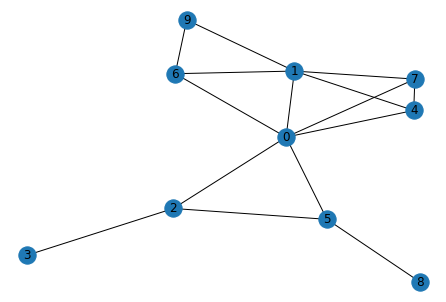

In [2]:
g=nx.gnm_random_graph(10,15, 123)
pos = nx.spring_layout(g, seed=111)
nx.draw(g, pos=pos, with_labels=True)

In [8]:
graph_partition = GraphPartition(g)

In [9]:
qp = graph_partition.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Graph partition

Minimize
 obj: 6 x_0 + 5 x_1 + 3 x_2 + x_3 + 3 x_4 + 3 x_5 + 3 x_6 + 3 x_7 + x_8 + 2 x_9
      + [ - 4 x_0*x_1 - 4 x_0*x_2 - 4 x_0*x_4 - 4 x_0*x_5 - 4 x_0*x_6
      - 4 x_0*x_7 - 4 x_1*x_4 - 4 x_1*x_6 - 4 x_1*x_7 - 4 x_1*x_9 - 4 x_2*x_3
      - 4 x_2*x_5 - 4 x_4*x_7 - 4 x_5*x_8 - 4 x_6*x_9 ]/2
Subject To
 c0: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 = 5

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1
 0 <= x_6 <= 1
 0 <= x_7 <= 1
 0 <= x_8 <= 1
 0 <= x_9 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5 x_6 x_7 x_8 x_9
End

In [10]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 4.0
optimal value: [1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
status: SUCCESS

[[2, 3, 5, 8, 9], [0, 1, 4, 6, 7]]


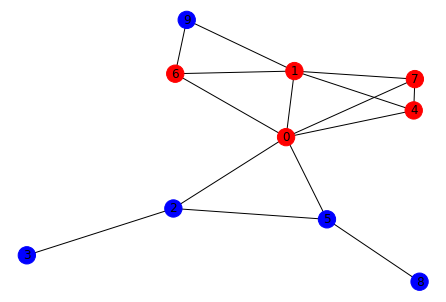

In [12]:
print(graph_partition.interpret(result))
graph_partition.draw(result, pos=pos)